# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment: Implementation of Domain Adaptation Aglorithm on PACS Dataset

## Learning Objectives

At the end of the experiment, you will be able to :

* Understanding the concept and importance of domain adaptation.

* Familiarizing with the PACS dataset and its structure, including classes and domains.

* Learning to implement a modified version of the AlexNet architecture for domain adaptation tasks.

## Introduction


The field of Computer vision has made significant progress thanks to effectiveness of Convolutional Neural Networks (CNNs). As an example, in a classification task, you would often use one of the standard network architectures out there (AlexNet, ResNet, etc.) and train it using your dataset. This would likely lead to very good performance. Moreover, using Transfer Learning and training on a network that is pretrained on a large dataset and tune some of its upper layers using your own small annotated dataset has a huge impact on the results. Both of these approaches assume that your training data is representative of the underlying distribution. However, if the inputs at test time differ significantly from the training data, the model might not perform very well.


The reason the model did not perform very well in these scenarios is that the problem domain  changed. In this particular case, the domain of the input data changed while the task domain (the  labels) remained the same. On other occasions, you may want to use data from the same domain  to accomplish a new task. Similarly, the input and task domains could differ at the same time. In  these cases, domain adaptation comes to aid. Domain adaptation is a sub-discipline of machine  learning which deals with scenarios in which a model trained on a source distribution is used in  the context of a different target distribution. In general, domain adaptation uses labeled data in  one or more source domains to solve new tasks in a target domain.

Our method is to use Adversarial Domain Adaptation. This technique tries to achieve domain  adaptation by using adversarial training. if we use the domain confusion loss in addition to the  classification loss used for the current task. The domain confusion loss is similar to the  discriminator in GANs in that it tries to match the distributions of the source and target domains  in order to “confuse” the high-level classification layers. Perhaps the most famous example of  such a network is the Domain-Adversarial Neural Network (DANN). This network consists of two losses, the classification loss and the domain confusion loss. It contains a gradient reversal layer to  match the feature distributions. By minimizing the classification loss for the source samples and  the domain confusion loss for all samples, this makes sure that the samples are mutually  indistinguishable for the classifiers.



**Domain adaptation** is the ability to apply an algorithm trained in one or more "source domains" to a different (but related) "target domain". Domain adaptation is a subcategory of transfer learning. This scenario arises when we aim at learning from a source data distribution a well performing model on a different target data distribution.

In order to tackle the issue, a modified version of the AlexNet is used allowing not only to classify input images in the source domain but also to transfer this capability to the target domain.


<center>
<img src="https://github.com/hadinej/DL-Domain-adaptation-on-PACS-dataset/raw/main/images/dann_architecture.jpg" width=650px/>
</center>




## Dataset

### Description

For this anaysis the PACS dataset is used. It contains overall 9991 images, splittd unevenly among:

* 7 classes (Dog, Elephant, Giraffe, Guitar, Horse, House, Person) and
* 4 domains: Art painting, Cartoon, Photo and Sketch.


<center>
<img src="https://github.com/hadinej/DL-Domain-adaptation-on-PACS-dataset/raw/main/images/example_PACSdata_horse.jpg" width=650px/>

Sample images from the PACS dataset for the class 'horse' one for each domain, from left to right photo, art painting, cartoon and sketch.
</center>



### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2239822" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9167668365" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "Domain_adaptation_on_PACS_dataset_C" #name of the notebook


def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Loading the dataset

In [ ]:
!git clone https://github.com/MachineLearning2020/Homework3-PACS.git

Cloning into 'Homework3-PACS'...
remote: Enumerating objects: 10032, done.
remote: Total 10032 (delta 0), reused 0 (delta 0), pack-reused 10032
Receiving objects: 100% (10032/10032), 174.13 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (9993/9993), done.


### Importing required packages

In [ ]:
import os
import logging

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset, DataLoader
from torch.backends import cudnn

import torch.utils.data
import torchvision
from torchvision import transforms
from torchvision.models import alexnet
from torchvision.datasets import ImageFolder
from torchvision import datasets

from PIL import Image
from tqdm import tqdm

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import pickle

### Initializing CUDA

CUDA is used as an interface between our code and the GPU.

Normally, we run the code in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [ ]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 2.2.1+cu121 CUDA: True


If it's False, then we run the program on CPU. If it's True, then we run the program on GPU.

Let us initialize some GPU-related variables:

In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


### Define Hyperparameters

In [ ]:
DEVICE = 'cuda' # 'cuda' or 'cpu'
NUM_CLASSES = 7
DIR_RUNS = '02 VERE PROVE/'

# -----------------
ID_RUN = '9'
RUN_NUMBER = '1'

BATCH_SIZE = 256     # Higher batch sizes allows for larger learning rates. An empirical heuristic suggests that, when changing
										 # the batch size, learning rate should change by the same factor to have comparable results

LR = 1e-2          # The initial Learning Rate
MOMENTUM = 0.9       # Hyperparameter for SGD, keep this at 0.9 when using SGD
WEIGHT_DECAY = 5e-5  # Regularization, you can keep this at the default

NUM_EPOCHS = 60      # Total number of training epochs (iterations over dataset)
STEP_SIZE = 30        # How many epochs before decreasing learning rate (if using a step-down policy)
GAMMA = 0.1          # Multiplicative factor for learning rate step-down
ALPHA = 0.1					   # Multiplicative factor for the backpropogating gradient from the domain_classifier

DOMAIN_ADAPTATION = True
EVAL_ACCURACY_ON_TRAINING = True
EVAL_LOSS_AND_ACCURACY_ON_VALIDATION = True

### Define Data Preprocessing

In [ ]:
MEANS, STDS = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)

# Define transforms for training phase
train_transform = transforms.Compose([#transforms.Resize(256),      # Resizes short size of the PIL image to 256
									transforms.CenterCrop(224),  # Crops a central square patch of the image
																	 # 224 because torchvision's AlexNet needs a 224x224 input!
																	 # Remember this when applying different transformations, otherwise you get an error
									transforms.ToTensor(), # Turn PIL Image to torch.Tensor
									transforms.Normalize(MEANS, STDS) # Normalizes tensor with mean and standard deviation
])
# Define transforms for the evaluation phase
eval_transform = transforms.Compose([#transforms.Resize(256),
									transforms.CenterCrop(224),
									transforms.ToTensor(),
									transforms.Normalize(MEANS, STDS)
])

DATA_DIR = 'Homework3-PACS/PACS'

photo_dataset = torchvision.datasets.ImageFolder(DATA_DIR+'/photo', transform=train_transform)
art_dataset = torchvision.datasets.ImageFolder(DATA_DIR+'/art_painting', transform=train_transform)
cartoon_dataset = torchvision.datasets.ImageFolder(DATA_DIR+'/cartoon', transform=eval_transform)
sketch_dataset = torchvision.datasets.ImageFolder(DATA_DIR+'/sketch', transform=eval_transform)

PACSdataset = [photo_dataset, art_dataset, cartoon_dataset, sketch_dataset]

# Check dataset sizes
print('Photo Dataset: {}'.format(len(photo_dataset)))
print('Art Dataset: {}'.format(len(art_dataset)))
print('Cartoon Dataset: {}'.format(len(cartoon_dataset)))
print('Sketch Dataset: {}'.format(len(sketch_dataset)))

print('Classes:', photo_dataset.classes)

Photo Dataset: 1670
Art Dataset: 2048
Cartoon Dataset: 2344
Sketch Dataset: 3929
Classes: ['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']


### Function for plotting the distribution of classes across domain

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def plotBar(data1, data2, data3, data4, classes, color='#3949AB'):
	# unique, counts = np.unique(data, return_counts=True)
	# print('Mean images per class:', counts.mean())
	# print('Std images per class:', counts.std())

	unique, counts1 = np.unique(data1, return_counts=True)
	unique, counts2 = np.unique(data2, return_counts=True)
	unique, counts3 = np.unique(data3, return_counts=True)
	unique, counts4 = np.unique(data4, return_counts=True)

	fig, ax = plt.subplots(nrows=1, ncols=1)
	ax.set_title('Distribution of classes across domains', pad=20.0, alpha=0.85, fontweight='bold')

	width=0.18

	# plt.bar(unique, counts, width=width, color=color)
	plt.bar(unique-2*(width)+(width/2), counts1, width=width, color='#3949AB70', edgecolor='#3949AB95', linewidth=0.5, label='Photo')
	plt.bar(unique-(width/2), counts2, width=width, color='#f4433670', edgecolor='#f4433695', linewidth=0.5, label='Art paintings')
	plt.bar(unique+(width/2), counts3, width=width, color='#388E3C70', edgecolor='#388E3C95', linewidth=0.5, label='Cartoon')
	plt.bar(unique+2*(width)-(width/2), counts4, width=width, color='#FF8F0070', edgecolor='#FF8F0095', linewidth=0.5, label='Sketch')

	plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

	ax.set_xticks(unique)
	ax.set_xticklabels([(classe[0].upper()+classe[1:]) for classe in classes])

	plt.grid(alpha=0.2, axis='y')

	ax.legend()
	plt.show()


def imgshow(img):
	img = img / 2 + 0.5     # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()

	return

### Visualization of images from the dataset

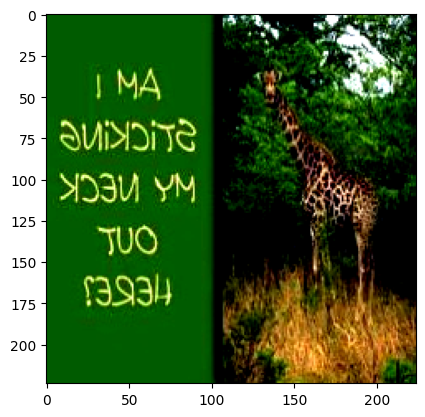

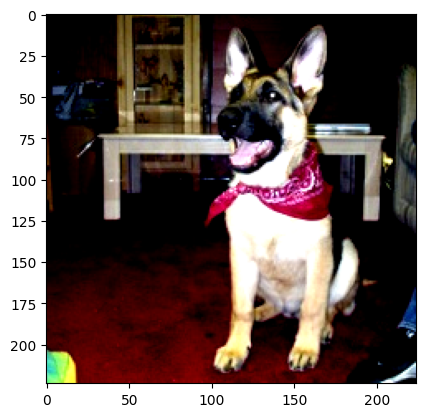

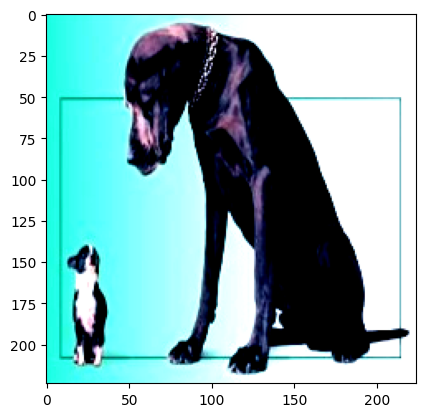

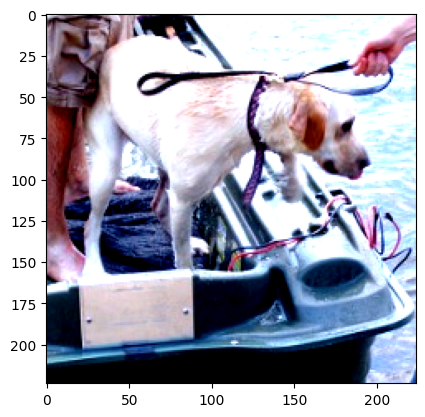

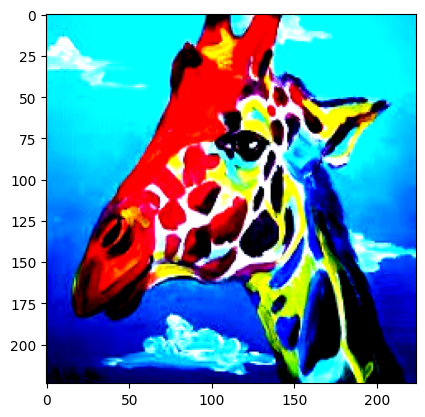

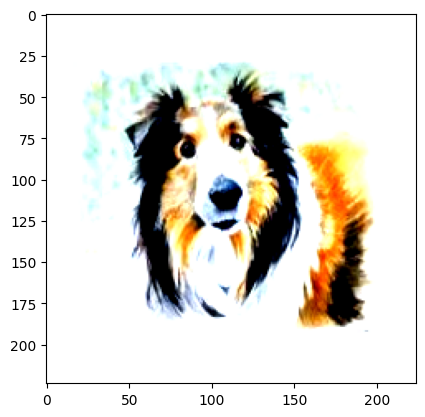

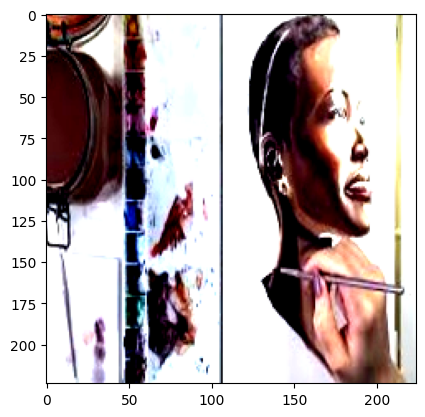

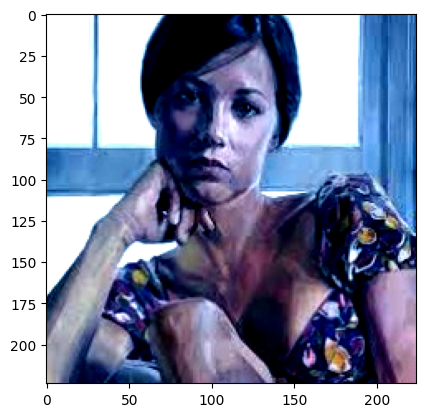

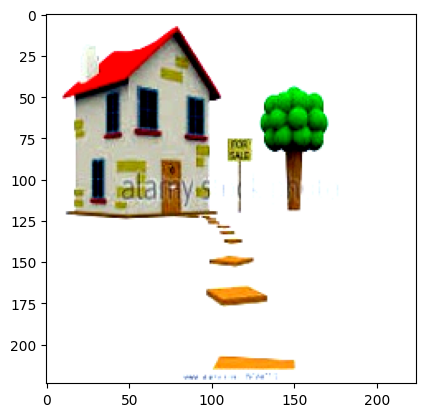

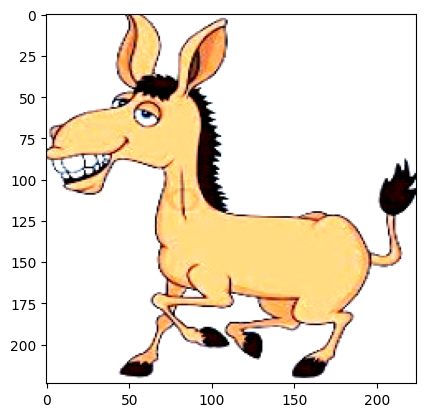

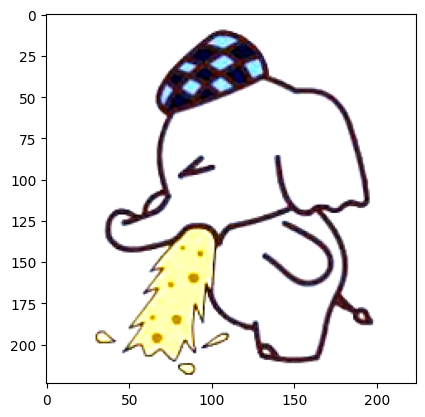

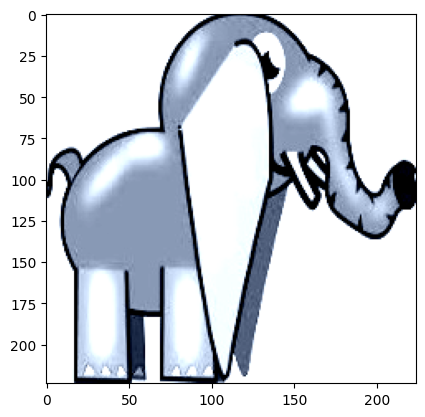

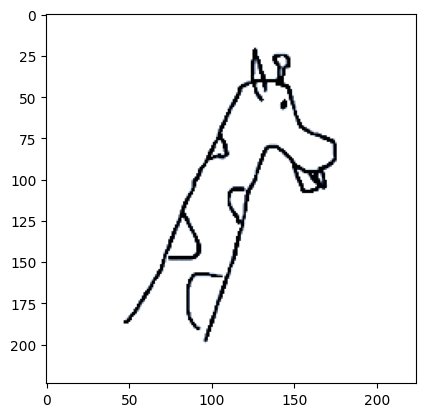

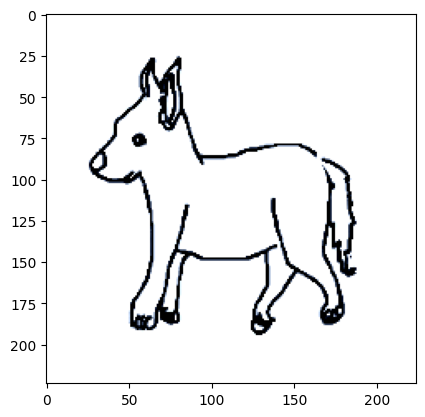

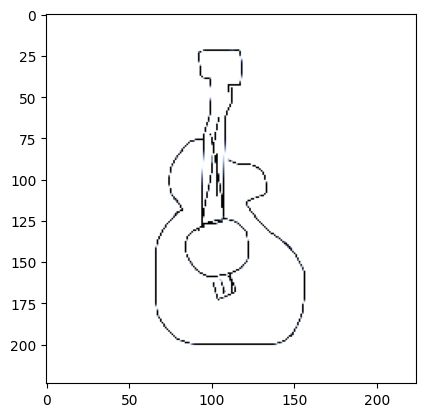

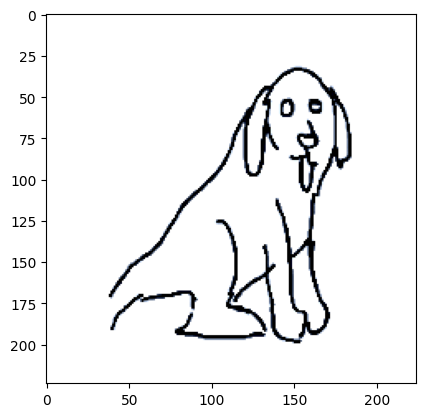

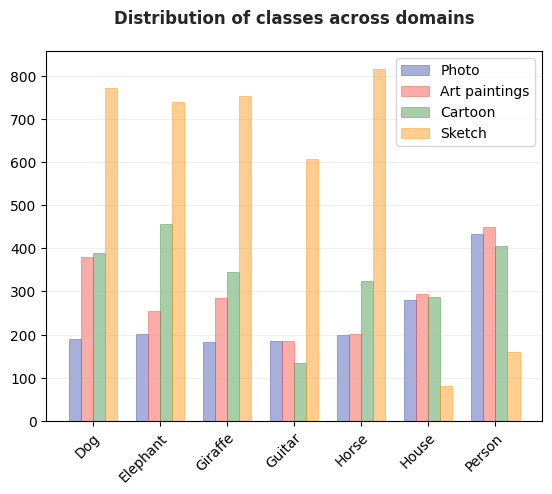

In [ ]:
# --- Print some images
nPhotos = 4
for dataset in PACSdataset:
	for i in range(nPhotos):
		index = np.random.randint(0, len(dataset))
		imgshow(dataset[index][0])

# --- Explore class distributions across domains
labels_photo = photo_dataset.targets
labels_art = art_dataset.targets
labels_cartoon = cartoon_dataset.targets
labels_sketch = sketch_dataset.targets
plotBar(labels_photo, labels_art, labels_cartoon, labels_sketch, photo_dataset.classes)

In [ ]:
# --- Training dataloaders
photo_dataloader = DataLoader(photo_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)
art_dataloader = DataLoader(art_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)

# --- Test datasets
photo_test_dataloader = DataLoader(photo_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
art_test_dataloader = DataLoader(art_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
cartoon_test_dataloader = DataLoader(cartoon_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
sketch_test_dataloader = DataLoader(sketch_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

### Defining the Model (Reconstructed AlexNet Model):

our task is to forge our model from AlexNet by first pre-loading the pre-trained weights on  ImageNet and modifying the “init function” of the module and add the Domain Classifier.  Considering the structure of DANN, I created a custom module where it can be seen in the  following figure, that I separated the layers of original AlexNet and first created my feature  extractor which are the first 5 convolutional layers of the model. The importance of this step is  that I need to pre-load the weights by using “state_dict”.

In PyTorch, the learnable parameters (i.e. weights and biases) of an torch.nn.Module model are  contained in the model’s parameters (accessed with model.parameters()). A state_dict is simply  a Python dictionary object that maps each layer to its parameter tensor. Note that only layers with  learnable parameters (convolutional layers, linear layers, etc.) and registered buffers (batchnorm’s  running_mean) have entries in the model’s state_dict. Optimizer objects (torch.optim) also have  a state_dict, which contains information about the optimizer’s state, as well as the  hyperparameters used.

Following that we use the same Fully connected layer of the original model in parallel for both  our Label Predictor and Domain Classifier. Now for introducing our DANN task we must modify  the forward function of the model and apply the principles of Adversarial Domain Adaptation.  Where we define the “ReverseLayerF” to apply the gradient reversal layer.

In [ ]:
import sys
import torch
import torch.nn as nn
from torch.autograd import Function

from torch.hub import load_state_dict_from_url

model_urls = {
    'alexnet': 'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth',
}

class ReverseLayerF(Function):
    # Forwards identity
    # Sends backward reversed gradients

    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha

        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha

        return output, None

class AlexNetDANN(nn.Module):

	def __init__(self, num_classes=1000):
		super(AlexNetDANN, self).__init__()

		self.features = nn.Sequential(
			nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=3, stride=2),
			nn.Conv2d(64, 192, kernel_size=5, padding=2),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=3, stride=2),
			nn.Conv2d(192, 384, kernel_size=3, padding=1),
			nn.ReLU(inplace=True),
			nn.Conv2d(384, 256, kernel_size=3, padding=1),
			nn.ReLU(inplace=True),
			nn.Conv2d(256, 256, kernel_size=3, padding=1),
			nn.ReLU(inplace=True),
			nn.MaxPool2d(kernel_size=3, stride=2),
		)
		self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

		self.classifier = nn.Sequential(
			nn.Dropout(),
			nn.Linear(256 * 6 * 6, 4096),
			nn.ReLU(inplace=True),
			nn.Dropout(),
			nn.Linear(4096, 4096),
			nn.ReLU(inplace=True),
			nn.Linear(4096, num_classes),
		)

		self.domain_classifier = nn.Sequential(
			nn.Dropout(),
			nn.Linear(256 * 6 * 6, 4096),
			nn.ReLU(inplace=True),
			nn.Dropout(),
			nn.Linear(4096, 4096),
			nn.ReLU(inplace=True),
			nn.Linear(4096, 2),
		)


	# DEFINE HOW FORWARD PASS IS COMPUTED
	def forward(self, x, alpha=None, dest='classifier'):
		"""
		# PYTORCH ALEXNET IMPLEMENTATION
			x = self.features(x)
			x = self.avgpool(x)
			x = torch.flatten(x, 1)
			x = self.classifier(x)
		"""

		"""
		# HW3 SUGGESTION OF IMPLEMENTATION
			features = self.features
	        features = features.view(features.size(0), -1)
	        if alpha is not None:
		        reverse_feature = ReverseLayerF.apply(features, alpha)
		        discriminator_output = ...
		        return discriminator_output
	        else:
	            class_outputs = ...
	            return class_outputs
		"""

		"""
		# PYTORCH DANN IMPLEMENTATION
			input_data = input_data.expand(input_data.data.shape[0], 3, 28, 28)
	        feature = self.feature(input_data)
	        feature = feature.view(-1, 50 * 4 * 4)
	        reverse_feature = ReverseLayerF.apply(feature, alpha)
	        class_output = self.class_classifier(feature)
	        domain_output = self.domain_classifier(reverse_feature)
        """

		x = self.features(x)
		x = self.avgpool(x)
		features = torch.flatten(x, 1)

		if dest == 'classifier':
			output = self.classifier(features)
			return output

		elif dest == 'domain_classifier':
			if alpha == None:
				print('FATAL ERROR - Attach a valid alpha when forwarding to the domain classifier')
				sys.exit()

			reverse_features = ReverseLayerF.apply(features, alpha)
			domain_output = self.domain_classifier(reverse_features)
			return domain_output

		else:
			print('FATAL ERROR - Invalid parameters to forward function in AlexNetDANN')
			sys.exit()

### Defining the pretrained Alexnet model

In [ ]:
def alexnetDANN(pretrained=True, progress=True, **kwargs):
    """
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    model = AlexNetDANN(num_classes=1000, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls['alexnet'],
                                              progress=progress)
        model.load_state_dict(state_dict, strict=False)

	# Change output classes
    model.classifier[6] = nn.Linear(4096, 7)
    model.domain_classifier[6] = nn.Linear(4096, 2)

    # Copy pretrained weights from the classifier to the domain_classifier
    model.domain_classifier[1].weight.data = model.classifier[1].weight.data.clone()
    model.domain_classifier[1].bias.data = model.classifier[1].bias.data.clone()

    model.domain_classifier[4].weight.data = model.classifier[4].weight.data.clone()
    model.domain_classifier[4].bias.data = model.classifier[4].bias.data.clone()

    return model

### Downloading the model

In [ ]:
net = alexnetDANN(pretrained=True)

# --- Check that pretrined weights have been correctly copied into the domain_classifier branch as well
#for domain_param, classifier_param in zip(list(net.classifier.parameters()), list(net.domain_classifier.parameters())):
  #print(torch.allclose(domain_param, classifier_param))

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:03<00:00, 62.7MB/s]


In [ ]:
print(net)

AlexNetDANN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=Tru

### Defining the Loss Function and Optimizer

In [ ]:
# Define loss function
criterion = nn.CrossEntropyLoss() # for classification, we use Cross Entropy
criterion_val = nn.CrossEntropyLoss(reduction='sum')

# Choose parameters to optimize
parameters_to_optimize = net.parameters()

# Define optimizer
# An optimizer updates the weights based on loss
# We use SGD with momentum
optimizer = optim.SGD(parameters_to_optimize, lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

# Define scheduler
# A scheduler dynamically changes learning rate
# The most common schedule is the step(-down), which multiplies learning rate by gamma every STEP_SIZE epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

### Training and Evaluating the model

In [ ]:
net = net.to(DEVICE)

cudnn.benchmark # Calling this optimizes runtime

current_step = 0
losses_train = []
losses_train_classifier = []
losses_train_domain = []
losses_val = []
accuracies_val = []
accuracies_train = []
# Start iterating over the epochs
for epoch in range(NUM_EPOCHS):
  print('Starting epoch {}/{}, LR = {}'.format(epoch+1, NUM_EPOCHS, scheduler.get_lr()))

  if DOMAIN_ADAPTATION:
    len_dataloader = min(len(photo_dataloader), len(art_dataloader))
    data_source_iter = iter(photo_dataloader)
    data_target_iter = iter(art_dataloader)
  else:
    len_dataloader = len(photo_dataloader)
    data_source_iter = iter(photo_dataloader)

  i = 0
  while i < len_dataloader:
  #for images, labels in photo_dataloader:
	  # Bring data over the device of choice
    data_source = next(data_source_iter)
    s_images, s_labels = data_source

    #print('Batch size inferred 1:', len(s_labels))

    s_images = s_images.to(DEVICE)
    s_labels = s_labels.to(DEVICE)

    net.train() # Sets module in training mode

    # PyTorch, by default, accumulates gradients after each backward pass
    # We need to manually set the gradients to zero before starting a new iteration
    optimizer.zero_grad() # Zero-ing the gradients

    if DOMAIN_ADAPTATION:
      # FEED-FORWARD SOURCE TO CLASSIFIER
      source_classifier_outputs = net(s_images, dest='classifier')
      source_classifier_err = criterion(source_classifier_outputs, s_labels)

      # FEED-FORWARD SOURCE TO DOMAIN_CLASSIFIER
      source_domain_outputs = net(s_images, alpha=ALPHA, dest='domain_classifier')
      source_domain_labels = torch.zeros(BATCH_SIZE).long().to(DEVICE)
      source_domain_err = criterion(source_domain_outputs, source_domain_labels)

      # FEED-FORWARD TARGET TO DOMAIN_CLASSIFIER
      data_target = next(data_target_iter)
      t_images, t_labels = data_target

      #print('Batch size inferred 2:', len(t_labels))

      t_images = t_images.to(DEVICE)
      t_labels = t_labels.to(DEVICE)

      target_domain_outputs = net(t_images, alpha=ALPHA, dest='domain_classifier')
      target_domain_labels = torch.ones(BATCH_SIZE).long().to(DEVICE)
      target_domain_err = criterion(target_domain_outputs, target_domain_labels)

      loss = source_classifier_err + source_domain_err + target_domain_err

    else:
      # Forward pass to the network
      outputs = net(s_images, dest='classifier')
      # Compute loss based on output and ground truth
      loss = criterion(outputs, s_labels)

    if current_step == 0 and DOMAIN_ADAPTATION == False:
      print('--- Initial loss on train: {}'.format(loss.item()))

    # Compute gradients for each layer and update weights
    loss.backward()  # backward pass: computes gradients
    optimizer.step() # update weights based on accumulated gradients

    current_step += 1
    i +=1

	# End of one epoch
  if DOMAIN_ADAPTATION:
    print('--- Epoch {}'.format(epoch+1))
    losses_train_classifier.append(source_classifier_err.item())
    losses_train_domain.append((source_domain_err.item()+target_domain_err.item()))
  else:
    print('--- Epoch {}, Loss on train: {}'.format(epoch+1, loss.item()))
    losses_train.append(loss.item())

  if EVAL_LOSS_AND_ACCURACY_ON_VALIDATION:

    net.train(False)

    running_corrects_val = 0
    cum_loss_val = 0

    #for images_val, labels_val in tqdm(val_dataloader):
    for images_val, labels_val in art_test_dataloader:
      images_val = images_val.to(DEVICE)
      labels_val = labels_val.to(DEVICE)

      # Forward Pass
      outputs_val = net(images_val, dest='classifier')

      cum_loss_val += criterion_val(outputs_val, labels_val).item()

      # Get predictions
      _, preds = torch.max(outputs_val.data, 1)

      # Update Corrects
      running_corrects_val += torch.sum(preds == labels_val.data).data.item()

    # Calculate Accuracy
    accuracy_val = running_corrects_val / float(len(art_dataset))
    loss_val = cum_loss_val / float(len(art_dataset))

    losses_val.append(loss_val)
    accuracies_val.append(accuracy_val)

    print('Loss on val:', loss_val)
    print('Accuracy on val:', accuracy_val)

  if EVAL_ACCURACY_ON_TRAINING:
    net.train(False)

    running_corrects_train = 0

    for images_train, labels_train in photo_test_dataloader:
      images_train = images_train.to(DEVICE)
      labels_train = labels_train.to(DEVICE)

      # Forward Pass
      outputs_train = net(images_train, dest='classifier')

      # Get predictions
      _, preds = torch.max(outputs_train.data, 1)

      # Update Corrects
      running_corrects_train += torch.sum(preds == labels_train.data).data.item()

    # Calculate Accuracy
    accuracy_train = running_corrects_train / float(len(photo_dataset))

    accuracies_train.append(accuracy_train)

    print('Accuracy on train:', accuracy_train)

	# Step the scheduler
  scheduler.step()

Starting epoch 1/60, LR = [0.01]
--- Epoch 1
Loss on val: 2.3936614394187927
Accuracy on val: 0.49169921875
Accuracy on train: 0.9365269461077844
Starting epoch 2/60, LR = [0.01]
--- Epoch 2
Loss on val: 3.3550326600670815
Accuracy on val: 0.49951171875
Accuracy on train: 0.9532934131736527
Starting epoch 3/60, LR = [0.01]
--- Epoch 3
Loss on val: 2.9433344304561615
Accuracy on val: 0.4609375
Accuracy on train: 0.9556886227544911
Starting epoch 4/60, LR = [0.01]
--- Epoch 4
Loss on val: 2.713152326643467
Accuracy on val: 0.4423828125
Accuracy on train: 0.9616766467065868
Starting epoch 5/60, LR = [0.01]
--- Epoch 5
Loss on val: 3.3006294928491116
Accuracy on val: 0.44140625
Accuracy on train: 0.9760479041916168
Starting epoch 6/60, LR = [0.01]
--- Epoch 6
Loss on val: 3.4492369145154953
Accuracy on val: 0.4716796875
Accuracy on train: 0.9910179640718563
Starting epoch 7/60, LR = [0.01]
--- Epoch 7
Loss on val: 3.2939833104610443
Accuracy on val: 0.51220703125
Accuracy on train: 0.99700

In [ ]:
net = net.to(DEVICE)
net.train(False) ## Set Network to evaluation mode

running_corrects = 0
for images, labels in tqdm(art_test_dataloader):
	images = images.to(DEVICE)
	labels = labels.to(DEVICE)

	# Forward Pass
	outputs = net(images, dest='classifier')

	# Get predictions
	_, preds = torch.max(outputs.data, 1)

	# Update Corrects
	running_corrects += torch.sum(preds == labels.data).data.item()

# Calculate Accuracy
accuracy = running_corrects / float(len(art_dataset))

print('Test Accuracy: {}'.format(accuracy))

100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

Test Accuracy: 0.52197265625


### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. The primary objective of domain adaptation in machine learning is to create a new neural network architecture for each target domain.

Answer1 = "TRUE" #@param ["","TRUE", "FALSE"]


### Consider the following Statements and answer Q2.


A) Feature Extractor

B) Label Predictor

C) Domain Classifier

D) Gradient Reversal Layer

In [ ]:
#@title Q.2. Which components are directly responsible for adversarial domain adaptation in the provided implementation?

Answer2 = "A, B and C" #@param ["","Only A", "Only C", "Only A and B", "Only B and C", "Only C and D", "A, B and C"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nil" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3231
Date of submission:  08 Apr 2024
Time of submission:  22:26:45
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
